In [7]:
import os 
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns

network_param_scenarios = ["Baseline (20 % Discount)", "33 % Discount"]
surge_scenarios = ["wind", "solar", "wind+solar"]

title_size = 16
ax_size=14

n_days = 10
main_save_dir = f"./surge_results_{n_days}"

def get_setting_variance(df): 
    return np.std(df["Optimum"])

univariate_surge = [0.1, 0.5, 0.7, 1.0, 1.2, 1.7, 2.0]

bivariate_surge = itertools.product([1.2, 1.5, 2.5], [0.1, 0.3, 0.7])

print("---- Time Horizon = 10 ----")
all_data = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
#         save_dir = f"{main_save_dir}/{network_param_scenario}/{scenario}"
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        data_file_pth= f"{save_dir}/results.csv"
        if os.path.exists(data_file_pth):
            surge_data = pd.read_csv(data_file_pth, index_col=0)
            all_data.append(surge_data)
            print(f"Scenario: {network_param_scenario} ({scenario})")
            print(f"\tStd Dev: {get_setting_variance(surge_data)}")
surge_res = pd.concat(all_data)

n_days = 30
main_save_dir = f"./surge_results_{n_days}"

print("---- Time Horizon = 30 ----")
all_data_30 = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        data_file_pth= f"{save_dir}/results.csv"
        if os.path.exists(data_file_pth):
            surge_data = pd.read_csv(data_file_pth, index_col=0)
            all_data.append(surge_data)
            print(f"Scenario: {network_param_scenario} ({scenario})")
            print(f"\tStd Dev: {get_setting_variance(surge_data)}")
surge_res_30 = pd.concat(all_data)

---- Time Horizon = 10 ----
Scenario: Baseline (20 % Discount) (wind)
	Std Dev: 47.95175054423706
Scenario: 33 % Discount (wind)
	Std Dev: 54.834620840299515
Scenario: Baseline (20 % Discount) (solar)
	Std Dev: 52.35391316361558
Scenario: 33 % Discount (solar)
	Std Dev: 94.33099684210933
Scenario: Baseline (20 % Discount) (wind+solar)
	Std Dev: 49.21174517575398
Scenario: 33 % Discount (wind+solar)
	Std Dev: 51.326973266507274
---- Time Horizon = 30 ----
Scenario: Baseline (20 % Discount) (wind)
	Std Dev: 31.594841003152908
Scenario: 33 % Discount (wind)
	Std Dev: 16.265474267110203
Scenario: Baseline (20 % Discount) (solar)
	Std Dev: 25.358227941480138
Scenario: 33 % Discount (solar)
	Std Dev: 20.401339707129814
Scenario: Baseline (20 % Discount) (wind+solar)
	Std Dev: 17.421999844892675
Scenario: 33 % Discount (wind+solar)
	Std Dev: 20.057686071445424


In [2]:
surge_res.head(3)

,Optimum,Solar Surge Factor,Wind Surge Factor,Network Parameter Scenario,Surge Scenario
0,310.344828,1.0,0.1,Baseline (20 % Discount),wind
1,347.000000,1.0,0.5,Baseline (20 % Discount),wind
2,385.000000,1.0,0.7,Baseline (20 % Discount),wind


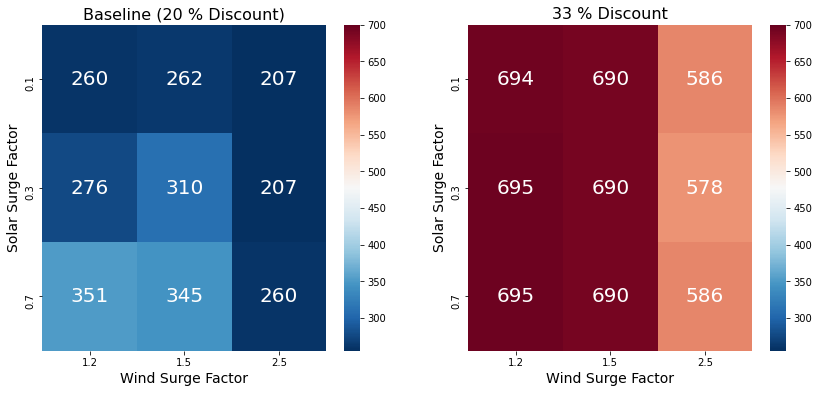

In [3]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

vmin=255
vmax=700
h_size = 20

ax = axes[0]
sub_df = surge_res.loc[surge_res["Surge Scenario"] == "wind+solar"]
network_scenario = "Baseline (20 % Discount)"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
show_df = show_df.pivot(index=y, columns=x, values=color)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".0f",ax=ax, vmin=vmin, vmax=vmax,annot_kws={"size": h_size})
ax.set_xlabel(x,fontsize=ax_size)
ax.set_ylabel(y,fontsize=ax_size)
# sns.set(font_scale=1.5)
ax.set_title(network_scenario,fontsize=title_size)
ax=axes[1]
sub_df = surge_res.loc[surge_res["Surge Scenario"] == "wind+solar"]
network_scenario = "33 % Discount"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
ax.set_title(network_scenario,fontsize=title_size)
show_df = show_df.pivot(index=y, columns=x, values=color)
ax.set_xlabel(x,fontsize=ax_size)
ax.set_ylabel(y,fontsize=ax_size)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".0f",ax=ax, vmin=vmin, vmax=vmax,annot_kws={"size": h_size})
plt.savefig("joint_surge_10.png")

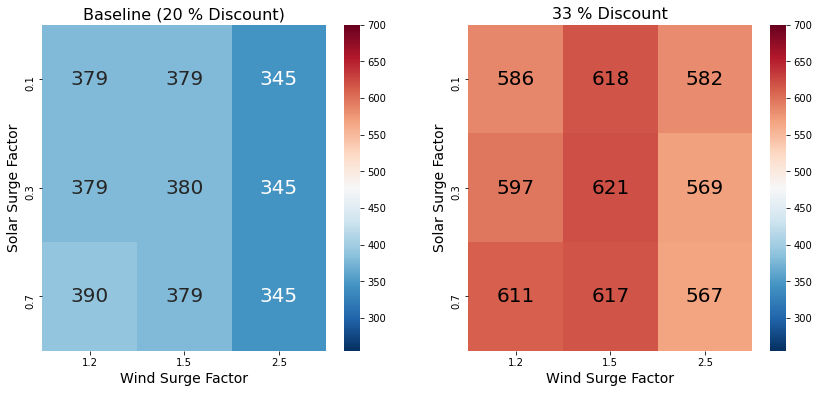

In [4]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

ax = axes[0]
sub_df = surge_res_30.loc[surge_res_30["Surge Scenario"] == "wind+solar"]
network_scenario = "Baseline (20 % Discount)"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
show_df = show_df.pivot(index=y, columns=x, values=color)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".0f",ax=ax, vmin=vmin, vmax=vmax,annot_kws={"size": h_size})
# ax.set_xlabel("")
ax.set_xlabel(x,fontsize=ax_size)
ax.set_ylabel(y,fontsize=ax_size)
ax.set_title(network_scenario,fontsize=title_size)
ax=axes[1]
sub_df = surge_res_30.loc[surge_res_30["Surge Scenario"] == "wind+solar"]
network_scenario = "33 % Discount"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
ax.set_title(network_scenario,fontsize=title_size)
show_df = show_df.pivot(index=y, columns=x, values=color)
ax.set_xlabel(x,fontsize=ax_size)
ax.set_ylabel(y,fontsize=ax_size)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".0f",ax=ax, vmin=vmin, vmax=vmax,annot_kws={"size": h_size,"color":"black"})
plt.savefig("joint_surge_30.png")

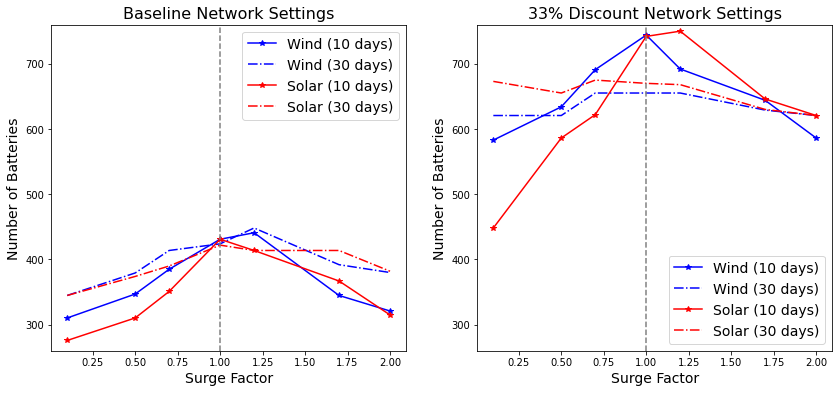

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# fig.suptitle('Measuring Network Robustness to Wind and Solar Supply Variability', fontsize=title_size + 3)

show_scenarios = ["wind", "solar"]
y_min = 260
y_max = 760

ax = axes[0]

capacity_scale = 1 # set to 2 if showing opt tot capacity instead of num batteries
legend_text_size = 14

network_scenario = "Baseline (20 % Discount)"
joint_wind_vals = [1.2, 1.5, 2.5]
joint_solar_vals = [0.1, 0.3, 0.7]
for surge_scenario in show_scenarios: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: 
            if surge_scenario == "wind+solar": continue
            show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "blue"#"green"
        elif surge_scenario == "solar": 
            if n_days == 10: 
                color = "red"
            else: color = "red"#"orange"
        else: 
            color = "purple"
                
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
            
        if surge_scenario == "wind+solar": 
            sub_df = sub_df.loc[sub_df["Wind Surge Factor"] == 1.5]
            ax.plot(joint_solar_vals, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
        else: 
            ax.plot(univariate_surge, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
ax.legend(prop={'size': legend_text_size})
ax.set_title(f"Baseline Network Settings",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Number of Batteries",fontsize=ax_size)
ax.axvline(x=1.0,color='gray', linestyle='--')
ax.set_ylim([y_min,y_max])

ax = axes[1]
network_scenario = "33 % Discount"
joint_wind_vals = [1.2, 1.5, 2.5]
joint_solar_vals = [0.1, 0.3, 0.7]
for surge_scenario in show_scenarios: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: 
            if surge_scenario == "wind+solar": continue
            show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "blue"#"green"
        elif surge_scenario == "solar": 
            if n_days == 10: 
                color = "red"
            else: color = "red"#"orange"
        else: 
            color = "purple"
                
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
            
        if surge_scenario == "wind+solar": 
            sub_df = sub_df.loc[sub_df["Wind Surge Factor"] == 1.5]
            ax.plot(joint_solar_vals, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
        else: 
            ax.plot(univariate_surge, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
ax.legend(loc="lower right", prop={'size': legend_text_size})
ax.set_title(f"33% Discount Network Settings",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Number of Batteries",fontsize=ax_size)
ax.set_ylim([y_min,y_max])
ax.axvline(x=1.0,color='gray', linestyle='--')
plt.savefig("surge.png",dpi=400)



In [ ]:
# check variance 

